<a href="https://colab.research.google.com/github/mitrarokni2019/AI4IA/blob/main/AI4IA_Assignment3_taskABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task B**

Task B/P1

In [ ]:
import numpy as np
#Generate 10 training examples and a constant add bias to the X matrix
N=10
a_true = 4.0
b_true = 3.0

X = 2 * np.random.rand(N, 1)
#print("*XXX*",X)
y = a_true*X + b_true

X_b=np.column_stack([np.ones((N, 1)), X])   # add x0 = 1 to each instance as first column
#print("*X_b*",X_b.shape)


eta = 0.1   # learning rate
n_iterations = 300

a0 = 1.0
b0 = 1.0
w =  np.array([[b0],[a0]])# np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
  grad = 2/N * X_b.T.dot(X_b.dot(w) - y)# 
  w = w - eta * grad
  #print("%w in %",w)

w_from_np=w
print(w_from_np)


[[3.00001095]
 [3.99999097]]


TaskB/P2

In [ ]:
import tensorflow as tf
import numpy as np
N=10
a_true = 4.0
b_true = 3.0
X = 2 * np.random.rand(N, 1)
y = a_true*X + b_true
X_b=np.column_stack([np.ones((N, 1)), X])# add x0 = 1 to each instance as first column

#Convert from numpy to tensorflow variables
tf_X_b=tf.convert_to_tensor(X_b, dtype=tf.float64)
#print("@@@",tf_X_b)
tf_y=tf.convert_to_tensor(y, dtype=tf.float64)
#print("@@@",tf_y)

#Build an in house mean squared error function called mse_inhouse
def mse_inhouse(*args):
  tf_w=args[0] # gettong the parameters from first element of tensorflow 
  tf_X_b=args[1]# gettong the x
  tf_y=args[2]  # gettong the y_true 
  tf_y_hat=tf.matmul(tf_X_b,tf_w)  # predicted_y
  tf_mse=tf.math.reduce_mean((tf_y_hat-tf_y)**2)  # COST or J
  return tf_mse
  
eta = 0.1# learning rate
n_iterations = 300
w_random =  np.array([[b0],[a0]]) # initial guess of parameters a & b
tf_w=tf.convert_to_tensor(w_random, dtype=tf.float64)#Convert initial guess to TF variable
  
for iteration in range(n_iterations):
  with tf.GradientTape() as tape:
    tape.watch(tf_w)
    tf_mse = mse_inhouse(tf_w,tf_X_b,tf_y) # cost 
    grad_mse_inhouse = tape.gradient(tf_mse, tf_w)
    tf_w = tf_w - eta * grad_mse_inhouse
tf_w
      
w_from_tf=np.array(tf_w)#Tensorflow2 allows direct conversion like this

print(w_from_tf)

[[3.00011231]
 [3.99990579]]


task B/P3

In [ ]:
import torch
from torch import autograd

N=10
a_true = 4.0
b_true = 3.0

X = 2 * torch.randn(N, 1)  
y_obs = a_true*X + b_true # true  y 

def my_linear_model(X, w):
  a = w[0]
  b = w[1]
  return a*X + b
  
def my_l2_loss_function(y_pred, y_true): 
  return torch.pow(y_true - y_pred, 2.0)
    
def my_cost_function(y_pred, y_true):
  loss_over_data = my_l2_loss_function(y_pred, y_true)
  return torch.mean(loss_over_data)
      
eta = 0.01# 'learning rate aka step-size'
n_iterations = 300# Nr. GD iterations
w_pt =  torch.randn(size=[2], requires_grad=True)# Param Init
      
for iteration_i in range(n_iterations):
  y_preds = my_linear_model(X, w_pt)   # predicted y 
  cost = my_cost_function(y_preds, y_obs)# cost function with respect of predicted_y and true_y 
  cost.backward()
  with torch.no_grad():
    w_pt -= eta*w_pt.grad #updating parameters 
  w_pt.grad.zero_()
          
w_from_PyTorch = w_pt.detach().numpy()
w_from_PyTorch

array([4.004627 , 2.9829834], dtype=float32)

# **task C**

# 1. The plain linear model:  f(x;a,b)=ax+b 

In [ ]:
# over parameter a

import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

def model(X, a,b):
  return a*X + b

xt=torch.linspace(0,10,100)
xt

tensor([ 0.0000,  0.1010,  0.2020,  0.3030,  0.4040,  0.5051,  0.6061,  0.7071,
         0.8081,  0.9091,  1.0101,  1.1111,  1.2121,  1.3131,  1.4141,  1.5152,
         1.6162,  1.7172,  1.8182,  1.9192,  2.0202,  2.1212,  2.2222,  2.3232,
         2.4242,  2.5253,  2.6263,  2.7273,  2.8283,  2.9293,  3.0303,  3.1313,
         3.2323,  3.3333,  3.4343,  3.5354,  3.6364,  3.7374,  3.8384,  3.9394,
         4.0404,  4.1414,  4.2424,  4.3434,  4.4444,  4.5455,  4.6465,  4.7475,
         4.8485,  4.9495,  5.0505,  5.1515,  5.2525,  5.3535,  5.4545,  5.5556,
         5.6566,  5.7576,  5.8586,  5.9596,  6.0606,  6.1616,  6.2626,  6.3636,
         6.4646,  6.5657,  6.6667,  6.7677,  6.8687,  6.9697,  7.0707,  7.1717,
         7.2727,  7.3737,  7.4747,  7.5758,  7.6768,  7.7778,  7.8788,  7.9798,
         8.0808,  8.1818,  8.2828,  8.3838,  8.4848,  8.5859,  8.6869,  8.7879,
         8.8889,  8.9899,  9.0909,  9.1919,  9.2929,  9.3939,  9.4950,  9.5960,
         9.6970,  9.7980,  9.8990, 10.00

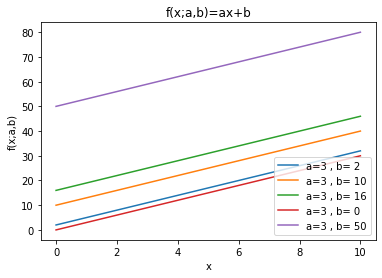

In [ ]:
a=3
b=[2,10,16,0,50]


for i in range (len(b)):
  y_pred=model(xt,a,b[i])
  #print (y_pred)
  plt.plot(xt,y_pred,label=f"a={a} , b= {b[i]}")
  plt.title("f(x;a,b)=ax+b")
  plt.ylabel('f(x;a,b)')
  plt.xlabel('x')
  plt.legend(loc='lower right')
 

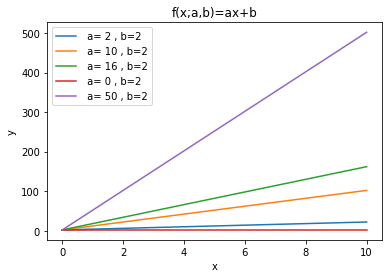

In [ ]:
a=[2,10,16,0,50]
b=2
for i in range (len(a)):
  y_pred=model(xt,a[i],b)
  #print (y_pred)
  plt.plot(xt,y_pred,label=f" a= {a[i]} , b={b}")
  plt.legend(loc='upper left')
  plt.title("f(x;a,b)=ax+b")
  plt.ylabel('y')
  plt.xlabel('x')

# 2. **Two parameter quadratic model:**f(x;a,b)= (x-a)^2+*b*

In [ ]:
import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

def model(X, a,b):
  return torch.pow(X-a,2)+b

xt=torch.linspace(-5,20,100)
xt

tensor([-5.0000, -4.7475, -4.4949, -4.2424, -3.9899, -3.7374, -3.4848, -3.2323,
        -2.9798, -2.7273, -2.4747, -2.2222, -1.9697, -1.7172, -1.4646, -1.2121,
        -0.9596, -0.7071, -0.4545, -0.2020,  0.0505,  0.3030,  0.5556,  0.8081,
         1.0606,  1.3131,  1.5657,  1.8182,  2.0707,  2.3232,  2.5758,  2.8283,
         3.0808,  3.3333,  3.5859,  3.8384,  4.0909,  4.3434,  4.5960,  4.8485,
         5.1010,  5.3535,  5.6061,  5.8586,  6.1111,  6.3636,  6.6162,  6.8687,
         7.1212,  7.3737,  7.6263,  7.8788,  8.1313,  8.3838,  8.6364,  8.8889,
         9.1414,  9.3939,  9.6465,  9.8990, 10.1515, 10.4040, 10.6566, 10.9091,
        11.1616, 11.4141, 11.6667, 11.9192, 12.1717, 12.4242, 12.6768, 12.9293,
        13.1818, 13.4343, 13.6869, 13.9394, 14.1919, 14.4444, 14.6970, 14.9495,
        15.2020, 15.4545, 15.7071, 15.9596, 16.2121, 16.4646, 16.7172, 16.9697,
        17.2222, 17.4747, 17.7273, 17.9798, 18.2323, 18.4848, 18.7374, 18.9899,
        19.2424, 19.4949, 19.7475, 20.00

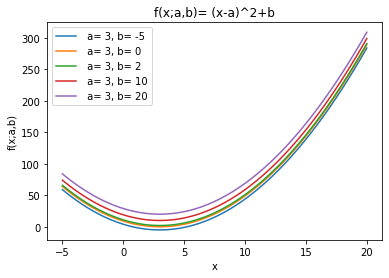

In [ ]:
a=3
b=[-5,0,2,10,20]


for i in range (len(b)):
  y_pred=model(xt,a,b[i])
  #print (y_pred)
  plt.plot(xt,y_pred,label= f" a= {a}, b= {b[i]}")
  plt.legend(loc='upper left')
  plt.title("f(x;a,b)= (x-a)^2+b")
  plt.ylabel('f(x;a,b)')
  plt.xlabel('x')

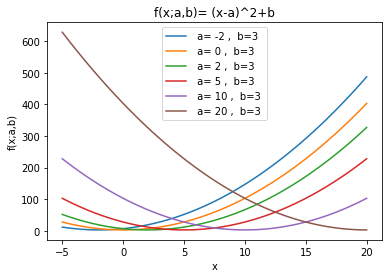

In [ ]:
a=[-2,0,2,5,10,20]
b=3
for i in range (len(a)):
  y_pred=model(xt,a[i],b)
  #print (y_pred)
  plt.plot(xt,y_pred,label=f" a= {a[i]} ,  b={b} ")
  plt.legend(loc='upper center')
  plt.title("f(x;a,b)= (x-a)^2+b")
  plt.ylabel('f(x;a,b)')
  plt.xlabel('x')

# 3. Michaelis-Menten type model:  f(x;a,b) =ax/ b+x  a≥0, b≥0, x≥0

In [ ]:
import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

def model(X, a,b):
  return (a*X)/(b+X)

xt=torch.linspace(0,20,100)
xt

tensor([ 0.0000,  0.2020,  0.4040,  0.6061,  0.8081,  1.0101,  1.2121,  1.4141,
         1.6162,  1.8182,  2.0202,  2.2222,  2.4242,  2.6263,  2.8283,  3.0303,
         3.2323,  3.4343,  3.6364,  3.8384,  4.0404,  4.2424,  4.4444,  4.6465,
         4.8485,  5.0505,  5.2525,  5.4545,  5.6566,  5.8586,  6.0606,  6.2626,
         6.4646,  6.6667,  6.8687,  7.0707,  7.2727,  7.4747,  7.6768,  7.8788,
         8.0808,  8.2828,  8.4848,  8.6869,  8.8889,  9.0909,  9.2929,  9.4949,
         9.6970,  9.8990, 10.1010, 10.3030, 10.5051, 10.7071, 10.9091, 11.1111,
        11.3131, 11.5152, 11.7172, 11.9192, 12.1212, 12.3232, 12.5253, 12.7273,
        12.9293, 13.1313, 13.3333, 13.5354, 13.7374, 13.9394, 14.1414, 14.3434,
        14.5455, 14.7475, 14.9495, 15.1515, 15.3535, 15.5556, 15.7576, 15.9596,
        16.1616, 16.3636, 16.5657, 16.7677, 16.9697, 17.1717, 17.3737, 17.5758,
        17.7778, 17.9798, 18.1818, 18.3838, 18.5859, 18.7879, 18.9899, 19.1919,
        19.3939, 19.5960, 19.7980, 20.00

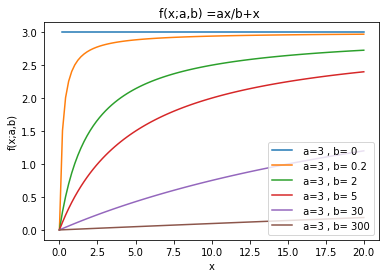

In [ ]:
a=3
b=[0,0.2,2,5,30,300]


for i in range (len(b)):
  y_pred=model(xt,a,b[i])
  #print (y_pred)
  plt.plot(xt,y_pred,label=f" a={a} , b= {b[i]}")
  plt.legend(loc='lower right')
  plt.title("f(x;a,b) =ax/b+x ")
  plt.ylabel('f(x;a,b)')
  plt.xlabel('x')

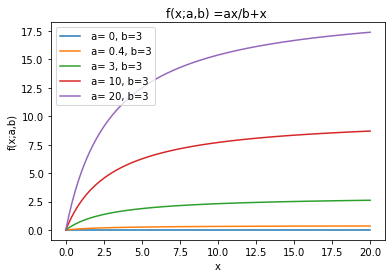

In [ ]:
a=[0,0.4,3,10,20]
b=3
for i in range (len(a)):
  y_pred=model(xt,a[i],b)
  #print (y_pred)
  plt.plot(xt,y_pred,label=f" a= {a[i]}, b={b}")
  plt.legend(loc='upper left')
  plt.title("f(x;a,b) =ax/b+x ")
  plt.ylabel('f(x;a,b)')
  plt.xlabel('x')

# **4.** Arrhenius type model: f(x;a,b) =ae ^(−b/x)  a≥0,  b≥0,  x≥0

In [ ]:
import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

def model(X, a,b):
  return a* torch.exp(-b/X)

xt=torch.linspace(0,30,100)
xt

tensor([ 0.0000,  0.3030,  0.6061,  0.9091,  1.2121,  1.5152,  1.8182,  2.1212,
         2.4242,  2.7273,  3.0303,  3.3333,  3.6364,  3.9394,  4.2424,  4.5455,
         4.8485,  5.1515,  5.4545,  5.7576,  6.0606,  6.3636,  6.6667,  6.9697,
         7.2727,  7.5758,  7.8788,  8.1818,  8.4848,  8.7879,  9.0909,  9.3939,
         9.6970, 10.0000, 10.3030, 10.6061, 10.9091, 11.2121, 11.5152, 11.8182,
        12.1212, 12.4242, 12.7273, 13.0303, 13.3333, 13.6364, 13.9394, 14.2424,
        14.5455, 14.8485, 15.1515, 15.4545, 15.7576, 16.0606, 16.3636, 16.6667,
        16.9697, 17.2727, 17.5758, 17.8788, 18.1818, 18.4848, 18.7879, 19.0909,
        19.3939, 19.6970, 20.0000, 20.3030, 20.6061, 20.9091, 21.2121, 21.5152,
        21.8182, 22.1212, 22.4242, 22.7273, 23.0303, 23.3333, 23.6364, 23.9394,
        24.2424, 24.5455, 24.8485, 25.1515, 25.4545, 25.7576, 26.0606, 26.3636,
        26.6667, 26.9697, 27.2727, 27.5758, 27.8788, 28.1818, 28.4848, 28.7879,
        29.0909, 29.3939, 29.6970, 30.00

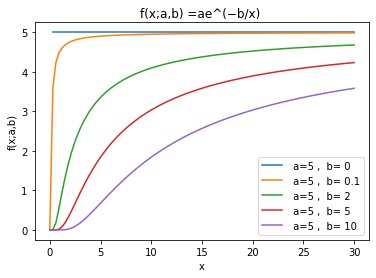

In [ ]:
a=5
b=[0,0.1,2,5,10]

for i in range (len(b)):
  y_pred=model(xt,a,b[i])
  #print (y_pred)
  plt.plot(xt,y_pred,label=f" a={a} ,  b= {b[i]}")
  plt.legend(loc='lower right')
  plt.title("f(x;a,b) =ae^(−b/x) ")
  plt.ylabel('f(x;a,b)')
  plt.xlabel('x')

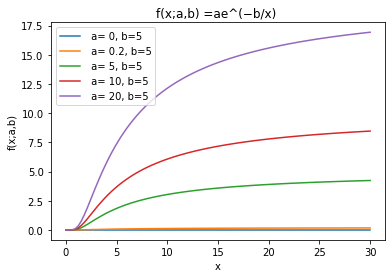

In [ ]:
a=[0,0.2,5,10,20]
b=5
for i in range (len(a)):
  y_pred=model(xt,a[i],b)
  #print (y_pred)
  plt.plot(xt,y_pred,label=f" a= {a[i]}, b={b}")
  plt.legend(loc='upper left')
  plt.title("f(x;a,b) =ae^(−b/x) ")
  plt.ylabel('f(x;a,b)')
  plt.xlabel('x')

# 5.  “Bell-curve” type model:  f(x;a,m,v) =ae^−(x−m)2/v  (v >0)

In [ ]:
import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

def model(X, a,m,v):
  return a* torch.exp(- torch.pow(X-m,2)/v)

xt=torch.linspace(-10,30,100)
xt

tensor([-10.0000,  -9.5960,  -9.1919,  -8.7879,  -8.3838,  -7.9798,  -7.5758,
         -7.1717,  -6.7677,  -6.3636,  -5.9596,  -5.5556,  -5.1515,  -4.7475,
         -4.3434,  -3.9394,  -3.5354,  -3.1313,  -2.7273,  -2.3232,  -1.9192,
         -1.5152,  -1.1111,  -0.7071,  -0.3030,   0.1010,   0.5051,   0.9091,
          1.3131,   1.7172,   2.1212,   2.5253,   2.9293,   3.3333,   3.7374,
          4.1414,   4.5455,   4.9495,   5.3535,   5.7576,   6.1616,   6.5657,
          6.9697,   7.3737,   7.7778,   8.1818,   8.5859,   8.9899,   9.3939,
          9.7980,  10.2020,  10.6061,  11.0101,  11.4141,  11.8182,  12.2222,
         12.6263,  13.0303,  13.4343,  13.8384,  14.2424,  14.6465,  15.0505,
         15.4545,  15.8586,  16.2626,  16.6667,  17.0707,  17.4747,  17.8788,
         18.2828,  18.6869,  19.0909,  19.4950,  19.8990,  20.3030,  20.7071,
         21.1111,  21.5152,  21.9192,  22.3232,  22.7273,  23.1313,  23.5354,
         23.9394,  24.3434,  24.7475,  25.1515,  25.5556,  25.95

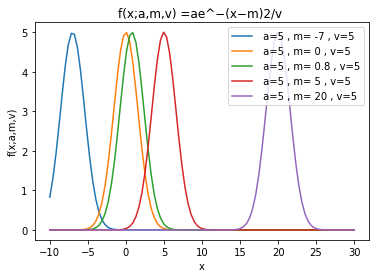

In [ ]:
a=5
m=[-7,0,0.8,5,20]
v=5
for i in range (len(m)):
  y_pred=model(xt,a,m[i],v)
  #print (y_pred)
  plt.plot(xt,y_pred,label= f" a={a} , m= {m[i]} , v={v}")
  plt.legend(loc='upper right')
  plt.title("f(x;a,m,v) =ae^−(x−m)2/v ")
  plt.ylabel('f(x;a,m,v)')
  plt.xlabel('x')

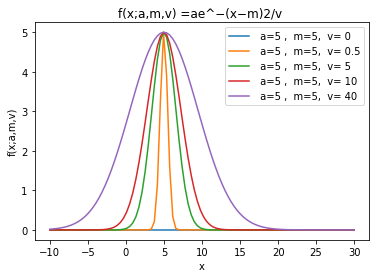

In [ ]:
a=5
m=5
v=[0,0.5,5,10,40]  #v should be >0
for i in range (len(v)):
  y_pred=model(xt,a,m,v[i])
  #print (y_pred)
  plt.plot(xt,y_pred,label= f" a={a} ,  m={m},  v= {v[i]}")
  plt.legend(loc='upper right')
  plt.title("f(x;a,m,v) =ae^−(x−m)2/v ")
  plt.ylabel('f(x;a,m,v)')
  plt.xlabel('x')

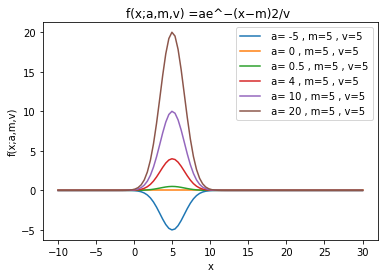

In [ ]:
a=[-5,0,0.5,4,10,20]
m=5
v=5
for i in range (len(a)):
  y_pred=model(xt,a[i],m,v)
  #print (y_pred)
  plt.plot(xt,y_pred,label=f" a= {a[i]} , m={m} , v={v}")
  plt.legend(loc='upper right')
  plt.title("f(x;a,m,v) =ae^−(x−m)2/v ")
  plt.ylabel('f(x;a,m,v)')
  plt.xlabel('x')

## 6.   Bimodal “sum-of-two-bell-curves” type model: 
   f(x;a1,m1,v2,a2,m2,v2) =a1 e^(−((x−m1))^2/v1)+a2  e^(−((x−m2)^2)/v2)

In [ ]:
import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

def model(X, a1,m1,v1,a2,m2,v2):
  z1=torch.exp(-torch.pow(X-m1,2)/v1)
  z2=torch.exp(-(X-m2)**2/v2)
  return a1* z1 + a2 *z2

xt=torch.linspace(-10,40,100)
xt

tensor([-10.0000,  -9.4949,  -8.9899,  -8.4848,  -7.9798,  -7.4747,  -6.9697,
         -6.4646,  -5.9596,  -5.4545,  -4.9495,  -4.4444,  -3.9394,  -3.4343,
         -2.9293,  -2.4242,  -1.9192,  -1.4141,  -0.9091,  -0.4040,   0.1010,
          0.6061,   1.1111,   1.6162,   2.1212,   2.6263,   3.1313,   3.6364,
          4.1414,   4.6465,   5.1515,   5.6566,   6.1616,   6.6667,   7.1717,
          7.6768,   8.1818,   8.6869,   9.1919,   9.6970,  10.2020,  10.7071,
         11.2121,  11.7172,  12.2222,  12.7273,  13.2323,  13.7374,  14.2424,
         14.7475,  15.2525,  15.7576,  16.2626,  16.7677,  17.2727,  17.7778,
         18.2828,  18.7879,  19.2929,  19.7980,  20.3030,  20.8081,  21.3131,
         21.8182,  22.3232,  22.8283,  23.3333,  23.8384,  24.3434,  24.8485,
         25.3535,  25.8586,  26.3636,  26.8687,  27.3737,  27.8788,  28.3838,
         28.8889,  29.3939,  29.8990,  30.4040,  30.9091,  31.4141,  31.9192,
         32.4242,  32.9293,  33.4343,  33.9394,  34.4444,  34.94

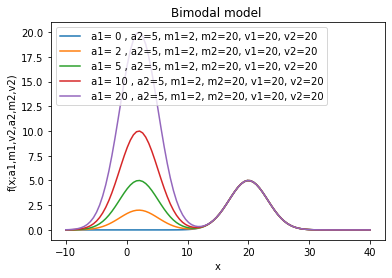

In [ ]:
a1=[0,2,5,10,20]
a2=5
m1=2
m2=20
v1=20
v2=20

for i in range (len(a1)):
  y_pred=model(xt,a1[i],m1,v1,a2,m2,v2)
  #print (y_pred)
  plt.plot(xt,y_pred,label=f" a1= {a1[i]} , a2={a2}, m1={m1}, m2={m2}, v1={v1}, v2={v2}")
  plt.legend(loc='upper left')  
  plt.title("Bimodal model ")
  plt.ylabel('f(x;a1,m1,v2,a2,m2,v2)')
  plt.xlabel('x')

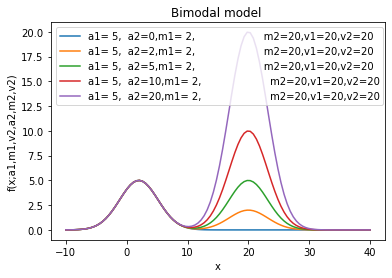

In [ ]:
a1=5
a2=[0,2,5,10,20]
m1=2
m2=20
v1=20
v2=20

for i in range (len(a2)):
  y_pred=model(xt,a1,m1,v1,a2[i],m2,v2)
  #print (y_pred)
  plt.plot(xt,y_pred,label=f"a1= {a1},  a2={a2[i]},m1= {m1},                      m2={m2},v1={v1},v2={v2}")
  plt.legend(loc='upper left')
  plt.title("Bimodal model ")
  plt.ylabel('f(x;a1,m1,v2,a2,m2,v2)')
  plt.xlabel('x')

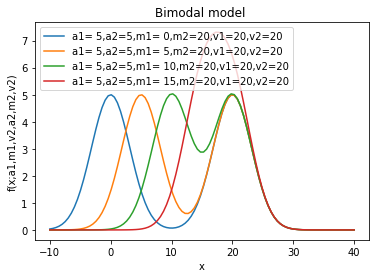

In [ ]:
a1=5
a2=5
m1=[0,5,10,15]
m2=20
v1=20
v2=20

for i in range (len(m1)):
  y_pred=model(xt,a1,m1[i],v1,a2,m2,v2)
  #print (y_pred)
  plt.plot(xt,y_pred,label=f"a1= {a1},a2={a2},m1= {m1[i]},m2={m2},v1={v1},v2={v2}")
  plt.legend(loc='upper left')
  plt.title("Bimodal model ")
  plt.ylabel('f(x;a1,m1,v2,a2,m2,v2)')
  plt.xlabel('x')

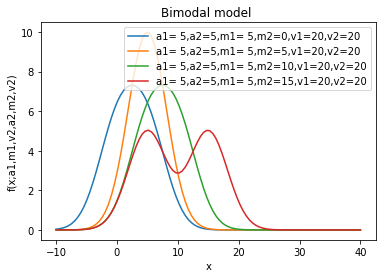

In [ ]:
a1=5
a2=5
m1=5
m2=[0,5,10,15]
v1=20
v2=20


for i in range (len(m2)):
  y_pred=model(xt,a1,m1,v1,a2,m2[i],v2)
  #print (y_pred)
  plt.plot(xt,y_pred,label=f"a1= {a1},a2={a2},m1= {m1},m2={m2[i]},v1={v1},v2={v2}")
  plt.legend(loc='upper right')
  plt.title("Bimodal model ")
  plt.ylabel('f(x;a1,m1,v2,a2,m2,v2)')
  plt.xlabel('x')

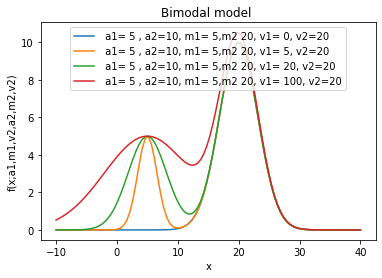

In [ ]:
a1=5
a2=10
m1=5
m2=20
v1=[0,5,20,100]
v2=20


for i in range (len(v1)):
  y_pred=model(xt,a1,m1,v1[i],a2,m2,v2)
  #print (y_pred)
  plt.plot(xt,y_pred,label= f" a1= {a1} , a2={a2}, m1= {m1},m2 {m2}, v1= {v1[i]}, v2={v2}")
  plt.legend(loc='upper center')
  plt.title("Bimodal model ")
  plt.ylabel('f(x;a1,m1,v2,a2,m2,v2)')
  plt.xlabel('x')

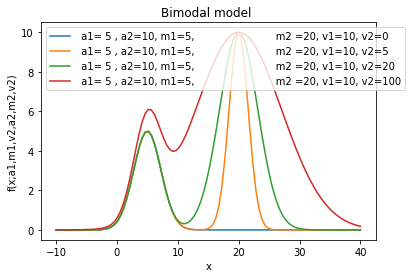

In [ ]:
a1=5
a2=10
m1=5
m2=20
v1=10
v2=[0,5,20,100]


for i in range (len(v2)):
  y_pred=model(xt,a1,m1,v1,a2,m2,v2[i])
  #print (y_pred)
  plt.plot(xt,y_pred,label= f" a1= {a1} , a2={a2}, m1={m1},                          m2 ={m2}, v1={v1}, v2={v2[i]}")
  plt.legend(loc='upper left')
  plt.title("Bimodal model ")
  plt.ylabel('f(x;a1,m1,v2,a2,m2,v2)')
  plt.xlabel('x')

# Task C/**Fig3**

Text(0.5, 0, 'x')

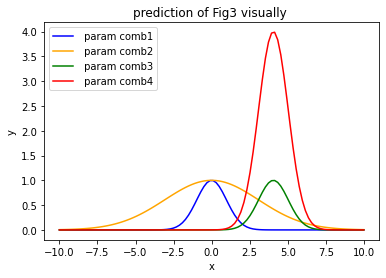

In [ ]:
import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

def model(X, a,m,v):
  return a* torch.exp(- torch.pow(X-m,2)/v)

xt=torch.linspace(-10,10,100)
xt

y_pred_1=model(xt,a=1.0,m=0,v=1.9)
y_pred_2=model(xt,a=1.0,m=0,v=19)
y_pred_3=model(xt,a=1.0,m=4.06,v=1.9)
y_pred_4=model(xt,a=4.0,m=4.06,v=1.9)
  #print (y_pred)
plt.plot(xt,y_pred_1, label= f" param comb1", color='b')
plt.plot(xt,y_pred_2,label= f" param comb2" ,color='orange')
plt.plot(xt,y_pred_3,label= f" param comb3", color='g')
plt.plot(xt,y_pred_4, label= f" param comb4",  color='r')
plt.legend(loc='upper left')
plt.title("prediction of Fig3 visually ")
plt.ylabel('y')
plt.xlabel('x')

Task c/ Dataset A, B, C

Text(0.5, 0, 'x')

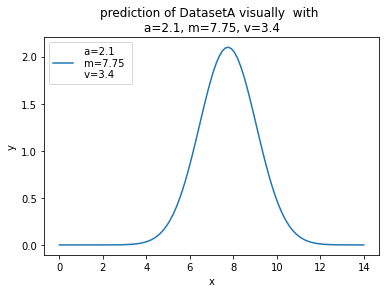

In [ ]:
import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

def model(X, a,m,v):
  return a* torch.exp(- torch.pow(X-m,2)/v)

xt=torch.linspace(0,14,100)
xt
a=2.1
m= 7.75 # 7.5
v= 3.4
y_pred=model(xt,a,m,v)
plt.plot(xt,y_pred ,label=f" a={a}\n m={m} \n v={v}")
plt.legend(loc='upper left')
plt.title(f"prediction of DatasetA visually  with \n a={a}, m={m}, v={v} ")
plt.ylabel('y')
plt.xlabel('x')

Text(0.5, 0, 'x')

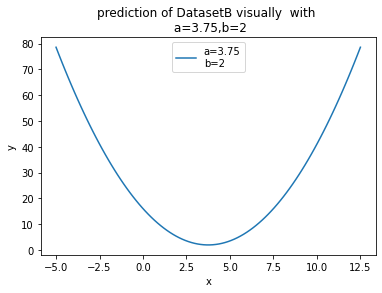

In [ ]:
import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

def model(X, a,b):
  return torch.pow(X-a,2)+b

xt=torch.linspace(-5,12.5,100)
xt
a= 3.75
b=2
y_pred=model(xt,a,b,)
plt.plot(xt,y_pred,label=f"a={a}\nb={b}")
plt.legend(loc='upper center')
plt.title(f"prediction of DatasetB visually  with \n a={a},b={b}")
plt.ylabel('y')
plt.xlabel('x')

Text(0.5, 0, 'x')

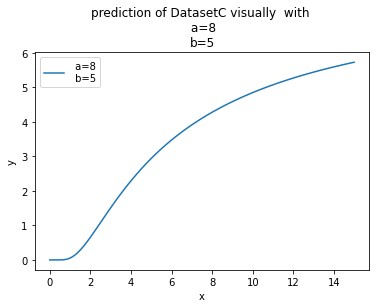

In [ ]:
import torch
from torch import autograd
import matplotlib.pyplot as plt
import numpy as np

def model(X, a,b):
  return a* torch.exp(-b/X)

xt=torch.linspace(0,15,100)

a=8
b=5
y_pred=model(xt,a,b)
#print (y_pred)
plt.plot(xt,y_pred, label=f" a={a}\n b={b}")

plt.legend(loc='upper left')
plt.title(f"prediction of DatasetC visually  with \n a={a}\nb={b}")
plt.ylabel('y')
plt.xlabel('x')

#xn=torch.tensor([4])
#yn=model(xn,a,b)
#print(yn)